# Predicción de puntos de muestreo

información del dataset: https://cdiac.ess-dive.lbl.gov/ftp/oceans/GLODAPv2/Data_Products/

## Exploratory Data Analysis 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../data/GLODAPv2 Merged Master File.csv')

In [4]:
df.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        cruise  station  cast  year  month  day  hour  minute  latitude  \
0           7      970     1  1992     11   21     0       0  -48.0058   
1           7      973     1  1992     11   23     0       0  -49.0092   
2           7      975     1  1992     11   23     0       0  -49.5000   
3           7      879     3  1992     10   18     0       0  -48.0133   
4           7      964     1  1992     11   20     0       0  -48.0108   
...       ...      ...   ...   ...    ...  ...   ...     ...       ...   
15255     719       26     1  2006      3   21     0       0   35.8600   
15256     719       23     1  2006      3   21     0       0   35.9130   
15257     719       38     1  2007      5    8     0       0   35.9850   
15258     719       27     1  2006      3   21     0       0   35.9110   
15259     719       22     1  2006      3   21     0       0   35.8920   

       longitude  ...     toc  tocf     doc  docf

In [10]:
df.info

<bound method DataFrame.info of        cruise  station  cast  year  month  day  hour  minute  latitude  \
0           7      970     1  1992     11   21     0       0  -48.0058   
1           7      973     1  1992     11   23     0       0  -49.0092   
2           7      975     1  1992     11   23     0       0  -49.5000   
3           7      879     3  1992     10   18     0       0  -48.0133   
4           7      964     1  1992     11   20     0       0  -48.0108   
...       ...      ...   ...   ...    ...  ...   ...     ...       ...   
15255     719       26     1  2006      3   21     0       0   35.8600   
15256     719       23     1  2006      3   21     0       0   35.9130   
15257     719       38     1  2007      5    8     0       0   35.9850   
15258     719       27     1  2006      3   21     0       0   35.9110   
15259     719       22     1  2006      3   21     0       0   35.8920   

       longitude  ...     toc  tocf     doc  docf     don  donf     tdn  tdnf  

In [11]:
df.columns

Index(['cruise', 'station', 'cast', 'year', 'month', 'day', 'hour', 'minute',
       'latitude', 'longitude',
       ...
       'toc', 'tocf', 'doc', 'docf', 'don', 'donf', 'tdn', 'tdnf', 'chla',
       'chlaf'],
      dtype='object', length=101)

In [12]:
df.describe()

cruise       station          cast          year         month  \
count  15260.000000  15260.000000  15260.000000  15260.000000  15260.000000   
mean     347.919987    894.160550      4.064220   2001.671232      6.132831   
std      190.853005   4303.049388     23.318664      5.990816      3.166003   
min        7.000000      0.000000      0.000000   1990.000000      1.000000   
25%      247.000000     31.000000      1.000000   1996.000000      3.000000   
50%      314.000000     74.000000      1.000000   2002.000000      6.000000   
75%      487.000000    174.250000      1.000000   2007.000000      9.000000   
max      719.000000  84987.000000    421.000000   2013.000000     12.000000   

                day          hour        minute      latitude     longitude  \
count  15260.000000  15260.000000  15260.000000  15260.000000  15260.000000   
mean      15.874705      6.403932     16.270249     12.598935     -9.023130   
std        8.897353      7.692873     19.542834     44.609750     99.627372   
min        1.000000      0.000000      0.000000    -77.960600   -179.829000   
25%        8.000000      0.000000      0.000000    -28.056325    -76.202200   
50%       16.000000      2.000000      5.000000     17.937450    -16.669100   
75%       24.000000     13.000000     32.000000     52.733100     61.195500   
max       31.000000     23.000000     81.000000     90.000000    180.000000   

       ...           toc          tocf           doc          docf  \
count  ...  15260.000000  15260.000000  15260.000000  15260.000000   
mean   ...  -9906.619470      8.935780  -9086.577974      8.364220   
std    ...    960.088711      0.667418   2886.886196      2.011593   
min    ...  -9999.000000      2.000000  -9999.000000      2.000000   
25%    ...  -9999.000000      9.000000  -9999.000000      9.000000   
50%    ...  -9999.000000      9.000000  -9999.000000      9.000000   
75%    ...  -9999.000000      9.000000  -9999.000000      9.000000   
max    ...    314.000000      9.000000    198.200000      9.000000   

                don          donf           tdn          tdnf          chla  \
count  15260.000000  15260.000000  15260.000000  15260.000000  15260.000000   
mean   -9957.042363      8.970642  -9538.848864      8.678899  -9672.018820   
std      646.546733      0.452389   2098.681720      1.464493   1778.462076   
min    -9999.000000      2.000000  -9999.000000      2.000000  -9999.000000   
25%    -9999.000000      9.000000  -9999.000000      9.000000  -9999.000000   
50%    -9999.000000      9.000000  -9999.000000      9.000000  -9999.000000   
75%    -9999.000000      9.000000  -9999.000000      9.000000  -9999.000000   
max       16.760000      9.000000     49.170000      9.000000     15.830000   

              chlaf  
count  15260.000000  
mean       8.771101  
std        1.244990  
min        2.000000  
25%        9.000000  
50%        9.000000  
75%        9.000000  
max        9.000000  

[8 rows x 101 columns]

In [5]:

df.isnull().sum().sort_values()


cruise      0
c13         0
sf6f        0
psf6        0
sf6         0
           ..
oxygenqc    0
oxygenf     0
oxygen      0
silicate    0
chlaf       0
Length: 101, dtype: int64

In [6]:
df = df.replace(-9999, np.nan)
df = df.fillna(df.mean())

In [7]:
df

cruise  station  cast  year  month  day  hour  minute  latitude  \
0           7      970     1  1992     11   21     0       0  -48.0058   
1           7      973     1  1992     11   23     0       0  -49.0092   
2           7      975     1  1992     11   23     0       0  -49.5000   
3           7      879     3  1992     10   18     0       0  -48.0133   
4           7      964     1  1992     11   20     0       0  -48.0108   
...       ...      ...   ...   ...    ...  ...   ...     ...       ...   
15255     719       26     1  2006      3   21     0       0   35.8600   
15256     719       23     1  2006      3   21     0       0   35.9130   
15257     719       38     1  2007      5    8     0       0   35.9850   
15258     719       27     1  2006      3   21     0       0   35.9110   
15259     719       22     1  2006      3   21     0       0   35.8920   

       longitude  ...        toc  tocf        doc  docf       don  donf  \
0       -6.00250  ...  70.477786     9  46.858668     9  5.274138     9   
1       -5.99083  ...  70.477786     9  46.858668     9  5.274138     9   
2       -6.00250  ...  70.477786     9  46.858668     9  5.274138     9   
3       -5.99833  ...  70.477786     9  46.858668     9  5.274138     9   
4       -6.00500  ...  70.477786     9  46.858668     9  5.274138     9   
...          ...  ...        ...   ...        ...   ...       ...   ...   
15255   -5.97800  ...  70.477786     9  46.858668     9  5.274138     9   
15256   -5.74300  ...  70.477786     9  46.858668     9  5.274138     9   
15257   -5.36300  ...  70.477786     9  46.858668     9  5.274138     9   
15258   -5.74700  ...  70.477786     9  46.858668     9  5.274138     9   
15259   -5.73800  ...  70.477786     9  46.858668     9  5.274138     9   

             tdn  tdnf      chla  chlaf  
0      32.294761     9  0.464541      9  
1      32.294761     9  0.464541      9  
2      32.294761     9  0.464541      9  
3      32.294761     9  0.464541      9  
4      32.294761     9  0.464541      9  
...          ...   ...       ...    ...  
15255  32.294761     9  0.464541      9  
15256  32.294761     9  0.464541      9  
15257  32.294761     9  0.464541      9  
15258  32.294761     9  0.464541      9  
15259  32.294761     9  0.464541      9  

[15260 rows x 101 columns]

## Feature Engineering

In [8]:
# Me que con las columnas que nos ineteresan

df = df[['year', 'latitude', 'longitude', 'pressure','depth','temperature', 'salinity', 'oxygen', 'nitrate', 'silicate', 'phosphate', 'phts25p0', 'talk','tco2']]

In [ ]:
df.head(10)

year  latitude  longitude  pressure   depth  temperature  salinity  \
0  1992  -48.0058   -6.00250     149.0  148.70       1.8029    33.973   
1  1992  -49.0092   -5.99083     150.0  148.70       0.4917    33.937   
2  1992  -49.5000   -6.00250     148.0  147.30       0.2692    33.968   
3  1992  -48.0133   -5.99833      98.0   98.15       1.2629    33.892   
4  1992  -48.0108   -6.00500     499.0  495.20       2.2676    34.417   
5  1992  -46.9867   -5.94333     500.0  495.30       2.1100    34.464   
6  1992  -48.0083   -5.99667     299.0  296.30       1.7869    34.228   
7  1992  -47.0000   -6.00083     998.0  988.20       2.3434    34.654   
8  1992  -56.9942  -23.30920     299.0  295.10       1.4145    34.473   
9  1992  -52.9925   -5.98833     298.0  296.10       1.7545    34.537   

    oxygen  nitrate  silicate  phosphate  phts25p0    tco2  
0  303.904  26.8560   20.6059    1.86878   7.71966  2139.1  
1  333.809  26.4661   26.2708    1.88915   7.70487  2146.9  
2  323.099  28.1257   31.2507    1.95005   7.68800  2155.1  
3  339.096  25.0997   21.2908    1.65560   7.75015  2137.9  
4  189.544  34.1691   60.8210    2.38598   7.55078  2235.0  
5  183.673  33.3869   68.2381    2.43666   7.57866  2227.7  
6  186.428  33.7833   65.0281    2.42693   7.55670  2238.4  
7  177.571  31.9181   74.6707    2.20283   7.57211  2234.4  
8  198.840  33.9724   77.4142    2.46710   7.55229  2242.8  
9  175.427  35.4351   79.7534    2.40607   7.47408  2270.7

##

<Axes: >

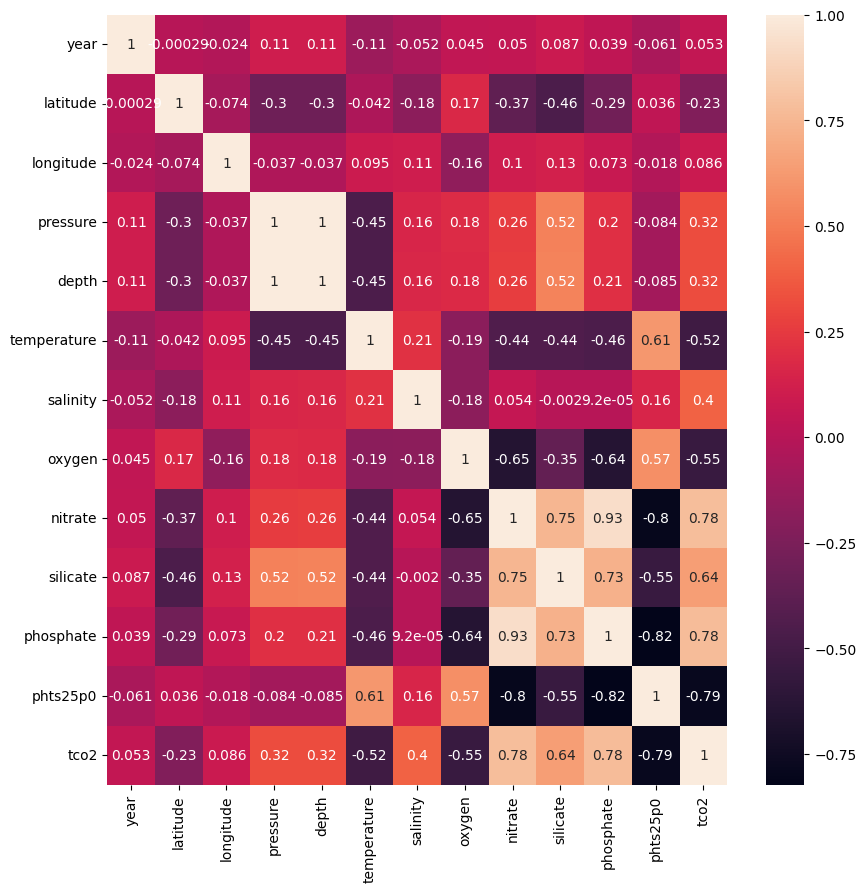

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot= True)

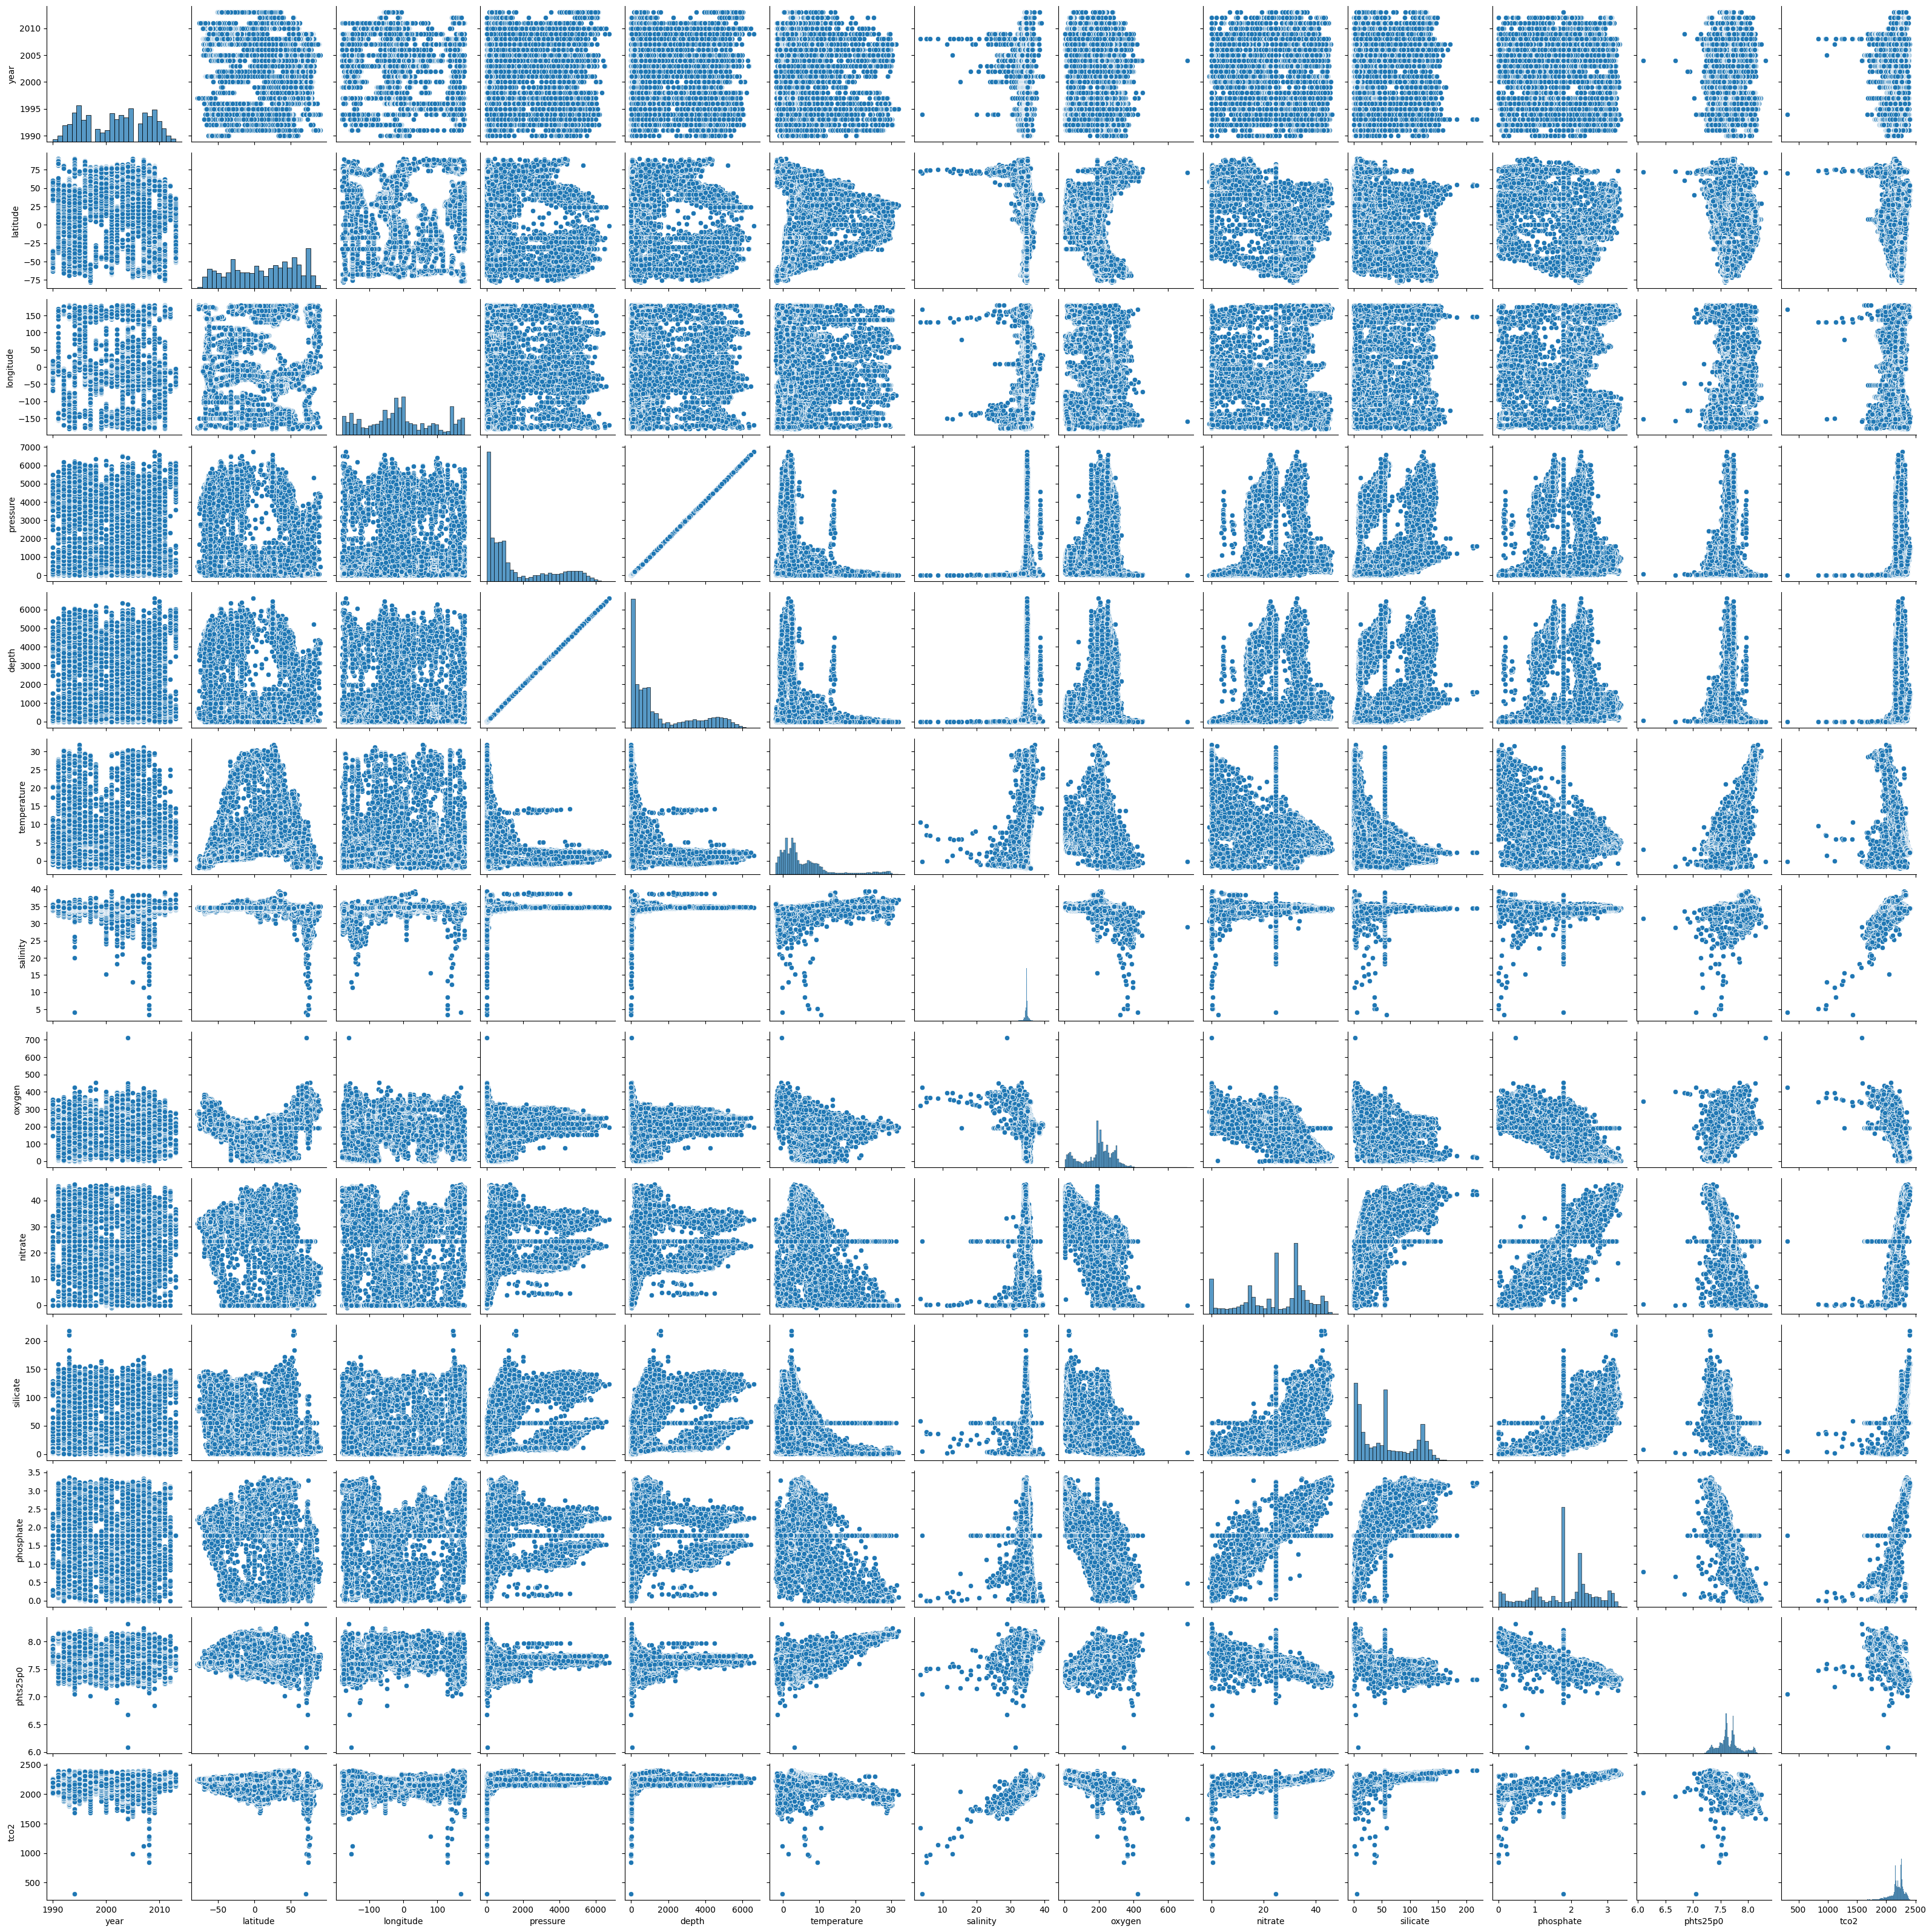

In [ ]:
sns.pairplot(df)

## Modelado

In [41]:
X = df.drop(['year','longitude', 'latitude','depth'], axis=1) # eliminamos las columnas de ubicación ya que no las necesitamos para nuestro modelo
y = df[['longitude', 'latitude']]

In [42]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [43]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Crear el modelo de Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = r2_score(y_test, y_pred)
print('Precisión del modelo:', accuracy)

Precisión del modelo: 0.8624482238259252


In [49]:
df_pred = pd.DataFrame({'longitude_real': y_test['longitude'],
                        'latitude_real': y_test['latitude'],
                        'longitude_pred': y_pred[:, 0],
                        'latitude_pred': y_pred[:, 1]})

# Calcular la precisión del modelo para cada coordenada
accuracy_lon = r2_score(df_pred['longitude_real'], df_pred['longitude_pred'])
accuracy_lat = r2_score(df_pred['latitude_real'], df_pred['latitude_pred'])

# Imprimir la precisión del modelo para cada coordenada
print('Precisión del modelo para longitud:', accuracy_lon)
print('Precisión del modelo para latitud:', accuracy_lat)


Precisión del modelo para longitud: 0.750738198288522
Precisión del modelo para latitud: 0.9741582493633285


In [50]:
df_results = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(y_pred, columns=['longitude_pred', 'latitude_pred'])], axis=1)


In [51]:
df_results

longitude  latitude  longitude_pred  latitude_pred
0      -10.7180   56.0140      -12.908589      54.947445
1      -23.0005   -1.6680      -14.732408      -0.034539
2      -17.4250   44.0770      -18.281282      45.064251
3      -31.6650  -17.9480      -33.934587     -28.060807
4      178.9990   15.5057      128.747087      12.130215
...         ...       ...             ...            ...
3047   -23.0005   -2.3332       -6.952320      -0.300339
3048     7.0000   75.0000       10.949570      74.778589
3049    40.4210  -33.0040       45.294975     -31.650779
3050  -170.0010  -33.4990     -155.296580     -30.581212
3051   144.8900  -47.4360       87.014283     -40.970548

[3052 rows x 4 columns]

In [29]:
from sklearn.model_selection import GridSearchCV

#definimos los parámetros a experimentar
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el modelo de Random Forest Regressor
model = RandomForestRegressor(random_state=42)

# Realizar la búsqueda de parámetros con GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros y precisión del modelo
print('Mejores parámetros:', grid_search.best_params_)
print('Precisión del modelo:', grid_search.best_score_)

# Hacer predicciones con los datos de prueba y los mejores parámetros encontrados
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calcular la precisión del modelo con los mejores parámetros
accuracy = r2_score(y_test, y_pred)
print('Precisión del modelo con mejores parámetros:', accuracy)

Mejores parámetros: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Precisión del modelo: 0.9094512597055264
Precisión del modelo con mejores parámetros: 0.9240086298706
